In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100


In [27]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [28]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=(validation_dataset), callbacks=[es])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 15376)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               7873024   
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 7,874,498
Trainable params: 7,874,498
Non-trainable params: 0
____________________________________________

2023-11-28 13:08:11.067392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - ETA: 0s - loss: 1.2823 - accuracy: 0.4798

2023-11-28 13:08:12.845139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 2s 47ms/step - loss: 1.2823 - accuracy: 0.4798 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 2/100
31/31 [==============================] - 1s 41ms/step - loss: 0.6920 - accuracy: 0.5161 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 3/100
31/31 [==============================] - 1s 40ms/step - loss: 0.6163 - accuracy: 0.7134 - val_loss: 0.6198 - val_accuracy: 0.6000
Epoch 4/100
31/31 [==============================] - 1s 42ms/step - loss: 0.4794 - accuracy: 0.7902 - val_loss: 0.4318 - val_accuracy: 0.8333
Epoch 5/100
31/31 [==============================] - 1s 41ms/step - loss: 0.3160 - accuracy: 0.9003 - val_loss: 0.3070 - val_accuracy: 0.9000
Epoch 6/100
31/31 [==============================] - 1s 41ms/step - loss: 0.2446 - accuracy: 0.9128 - val_loss: 0.2709 - val_accuracy: 0.8708
Epoch 7/100
31/31 [==============================] - 1s 42ms/step - loss: 0.3113 - accuracy: 0.8764 - val_loss: 0.3825 - val_accuracy: 0.8292
Epoch 8/100
31/31 

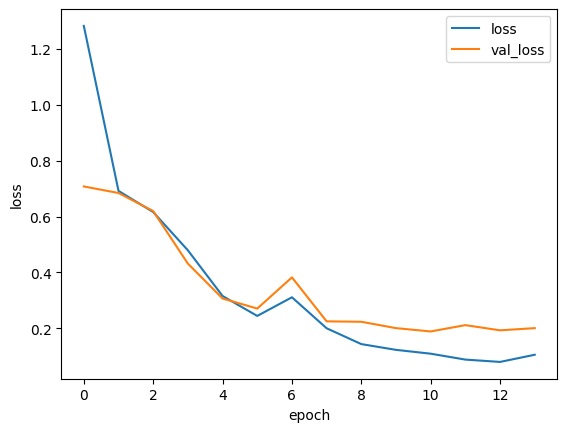

In [29]:
hist = pd.DataFrame(history.history)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [ ]:
img, label = validation_dataset.next()
y_pred = model.predict(img)

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    